# Importing Libraries

In [50]:
import time
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold, train_test_split, RepeatedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score
import statsmodels.formula.api as smf
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
#from xgboost import XGBRegressor
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import category_encoders as ce

# reading csv files

In [27]:
col = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class_value']
df =  pd.read_table('car.data', delimiter= ',', header=None, names=col)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Attribute Values:

#### buying:       v-high, high, med, low
#### maint:        v-high, high, med, low
#### doors:        2, 3, 4, 5-more
#### persons:      2, 4, more
#### lug_boot:     small, med, big
#### safety:       low, med, high

# Statistic Summary of df

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   buying    1728 non-null   object
 2   maint     1728 non-null   object
 3   doors     1728 non-null   object
 4   persons   1728 non-null   object
 5   lug_boot  1728 non-null   object
 6   safety    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [32]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class_value
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,small,high,unacc
freq,432,432,432,576,576,576,1210


## Frequency distribution of values in variables

In [33]:
for col in col:
    print(df[col].value_counts())   

high     432
vhigh    432
low      432
med      432
Name: buying, dtype: int64
high     432
vhigh    432
low      432
med      432
Name: maint, dtype: int64
2        432
5more    432
3        432
4        432
Name: doors, dtype: int64
2       576
more    576
4       576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class_value, dtype: int64


# Split feature and target variables

In [77]:
X = df.drop(['class_value'], axis=1)
y = df['class_value']

# Split data into training and test set

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [79]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# Feature Engineering

## Categorical Variables Encoding

In [80]:
# encode categorical variables with LabelEncoder

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\BOK\anaconda3\envs\test_env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [81]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [82]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# Model Building

In [83]:
# decision tree classifier
dtc = DecisionTreeClassifier(random_state = 0)

dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)

print('Model accuracy score with decision-trees : {0:0.4f}'. format(accuracy_score(y_test, dtc_pred)))

# extra tree classifier

etc = ExtraTreesClassifier(random_state = 0)

etc.fit(X_train, y_train)

etc_pred = etc.predict(X_test)

print('Model accuracy score with extra-trees : {0:0.4f}'. format(accuracy_score(y_test, etc_pred)))

# random forest classifier

rfc = RandomForestClassifier(random_state = 0)

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print('Model accuracy score with random forest : {0:0.4f}'. format(accuracy_score(y_test, rfc_pred)))

# gradient boosting classifier

gbc = GradientBoostingClassifier(random_state = 0)

gbc.fit(X_train, y_train)

gbc_pred = gbc.predict(X_test)

print('Model accuracy score with gradient boosting trees : {0:0.4f}'. format(accuracy_score(y_test, gbc_pred)))

Model accuracy score with decision-trees : 0.9422
Model accuracy score with extra-trees : 0.9264
Model accuracy score with random forest : 0.9457
Model accuracy score with gradient boosting trees : 0.9685


#### From the comparison, gradient boosting algorithm perform the best among all.

# Feature Importance

In [84]:
# view the feature scores

feature_scores = pd.Series(gbc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.350087
persons     0.345268
buying      0.136093
maint       0.113532
lug_boot    0.043533
doors       0.011485
dtype: float64

We can see that the most important feature is safety and least important feature is doors.

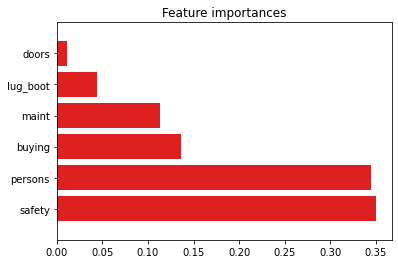

In [85]:
plt.title("Feature importances")
sns.barplot(x = feature_scores, y = feature_scores.index,
       color="r")
plt.yticks(range(len(feature_scores)), feature_scores.index)
plt.ylim([-1, len(feature_scores)])
plt.show()

# Build GBC with selected features (dropping the least impt feature, doors)

In [86]:
# declare feature vector and target variable

X = df.drop(['class_value', 'doors'], axis=1)

y = df['class_value']

In [87]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [88]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\BOK\anaconda3\envs\test_env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [89]:
# gradient boosting classifier

gbc = GradientBoostingClassifier(random_state = 0)

gbc.fit(X_train, y_train)

gbc_pred = gbc.predict(X_test)

print('Model accuracy score with gradient boosting trees : {0:0.4f}'. format(accuracy_score(y_test, gbc_pred)))

Model accuracy score with gradient boosting trees : 0.9387
